In [1]:
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


In [4]:
data=pd.read_csv("../data/linear_regression_data.csv")

In [5]:
def splitRandom(origin):
    list_all=np.arange(len(origin)).tolist()
    # split data into 4/5 for training 1/5 for testing
    count=int(len(data)*(4/5)) 
#randomly select amount of count in 0~ length of data(index of training) 
    list_training= random.sample(list_all, count)
  #array store index of testing
  
    list_testing=[]
    
 #test, training index are not duplicate
 
    for i in range(len(list_all)):
        for j in range(len(list_training)):
            if i==list_training[j]:
                break;
            else:
                if j==len(list_training)-1:
                    list_testing.append(i)

  #split data train, test using index
  
    data_training=pd.DataFrame({"Index":np.array([0]*len(list_training)),
                                "Distance":np.array([0]*len(list_training)),
                                "Delivery Time":np.array([0]*len(list_training))
                                })
    data_testing=pd.DataFrame({"Index":np.array([0]*len(list_testing)), 
                               "Distance":np.array([0]*len(list_testing)),
                               "Delivery Time":np.array([0]*len(list_testing))
                               })
    
    for i in range(len(list_training)):
        data_training.iloc[i,0]=list_training[i]
        data_training.iloc[i,1]=origin.iloc[list_training[i],0]
        data_training.iloc[i,2]=origin.iloc[list_training[i],1]
    
    for i in range(len(list_testing)):
        data_testing.iloc[i,0]=list_testing[i]
        data_testing.iloc[i,1]=origin.iloc[list_testing[i],0]
        data_testing.iloc[i,2]=origin.iloc[list_testing[i],1]
    
    
    return data_training, data_testing    



In [6]:
#data split to train, test, to call splitRandom function

train,test=splitRandom(data) 

#convert list to numpy array
array=train.to_numpy()
array_test=test.to_numpy()

#manage each of value of distance and deliver to nparray
distance=array[:,1]
deliver=array[:,2]


In [7]:
reg=linear_model.LinearRegression()# reg is object for linear regression
reg.fit(distance[:,np.newaxis],deliver)#fit linear moedel

px=np.array([distance.min()-1, distance.max()+1])#assign value of x
py=reg.predict(px[:,np.newaxis])#predict using the linear model


x=test.iloc[:,1]
result_predict=reg.predict(x[:,np.newaxis])#predict value of test


print(x)

0    150
1    130
2    200
3    100
4    260
5    180
Name: Distance, dtype: int64


In [8]:
rss=0
#print result and calculate rss

for i in range(len(test)):
    print("Distance: ",data.iloc[test.iloc[i,0],0], 
          "Predict delivery :",result_predict[i], 
          "Original delivery data", data.iloc[test.iloc[i,0],1])
    rss=(data.iloc[test.iloc[i,0],1]-result_predict[i])*(data.iloc[test.iloc[i,0],1]-result_predict[i])+rss
        
print("RSS is",rss)


Distance:  150 Predict delivery : 21.50331205919378 Original delivery data 20
Distance:  130 Predict delivery : 19.546816849998077 Original delivery data 22
Distance:  200 Predict delivery : 26.394550082183045 Original delivery data 24
Distance:  100 Predict delivery : 16.61207403620452 Original delivery data 19
Distance:  260 Predict delivery : 32.264035709770155 Original delivery data 34
Distance:  180 Predict delivery : 24.43805487298734 Original delivery data 22
RSS is 28.671798800072736


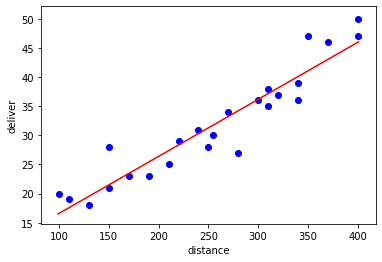

In [9]:
#plot a linear regression and scatter

plt.plot(px,py,color="r")
plt.scatter(distance, deliver,color="b")
plt.xlabel("distance")
plt.ylabel("deliver")
plt.show()

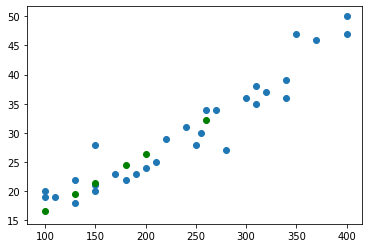

In [10]:
plt.scatter(data.iloc[:,0],data.iloc[:,1])
plt.scatter(x,result_predict,color="g")
plt.show()

In [11]:
#test with another data
#x1,y1 is test case
x1=pd.Series([400,100,390,337,150,95])
y1=pd.Series([40,15,30,50,25,20])

##predict value of another test case (x1,y1)using the linear model
result_predict_another=reg.predict(x1[:,np.newaxis])
rss=0

#print result and calculate rss
for i in range(len(x1)):
    print("Distance: ",x1[i], 
          "Predict delivery :",result_predict_another[i], 
          "Original delivery data", y1[i])
    rss=rss+(y1[i]-result_predict_another[i])*(y1[i]-result_predict_another[i])
print(rss)


Distance:  400 Predict delivery : 45.9595021741401 Original delivery data 40
Distance:  100 Predict delivery : 16.61207403620452 Original delivery data 15
Distance:  390 Predict delivery : 44.981254569542244 Original delivery data 30
Distance:  337 Predict delivery : 39.79654226517363 Original delivery data 50
Distance:  150 Predict delivery : 21.50331205919378 Original delivery data 25
Distance:  95 Predict delivery : 16.12295023390559 Original delivery data 20
393.9213285297562


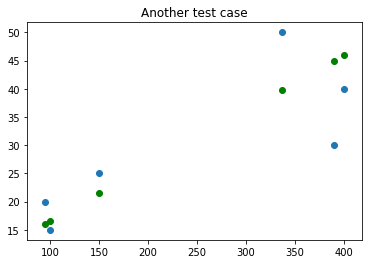

In [12]:
#plot a linear regression and scatter
plt.title("Another test case")
plt.scatter(x1,y1)
plt.scatter(x1,result_predict_another, color="g")

plt.show()